<a href="https://colab.research.google.com/github/KrimssmirK/PROJECT_DEEPLEARNING/blob/main/CNN_multi_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep Learning Project (multiclassification)

# 1. About Dataset

**Fruits 360 dataset**: *A dataset of images containing fruits and vegetables*.
[Kaggle](https://www.kaggle.com/datasets/moltean/fruits)
[Github](https://github.com/Horea94/Fruit-Images-Dataset/tree/master)

10 Fruits I selected to train a DNN model.
1. passion fruit (10)
2. lychee (10)
3. peach (10)
4. pear (10)
5. watermelon (10)
6. strawberry (10)
7. apricot (10)
8. avocado (10)
9. pomelo (10)
10. lemon (10)

Total **100 instances**

### location of the dataset

In [1]:
# dataset location (google drive)
import pathlib
data_dir = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/img_fruits")
test_dir = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/test")

### Verify the data

apricot


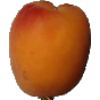

avocado


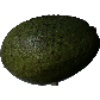

lemon


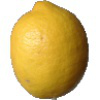

lychee


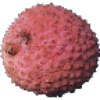

passion


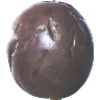

peach


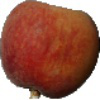

pear


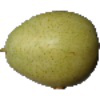

pomelo


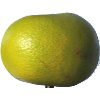

strawberry


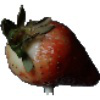

watermelon


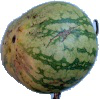

In [2]:
import PIL # Python Imaging Library

fruits = ["apricot", "avocado", "lemon", "lychee", "passion",
          "peach", "pear", "pomelo", "strawberry", "watermelon"]

for fruit in fruits:
  x_fruit = list(data_dir.glob(fruit + "/*"))
  print(fruit)
  PIL.Image.open(x_fruit[0]).show()

In [3]:
image_count = len(list(data_dir.glob("*/*.jpg")))
print('Number of images:', image_count)

Number of images: 100


# 2. Preprocessing

### import tensorflow

In [4]:
import tensorflow as tf

### preprocess

In [5]:
# define some parameters before load the image to create a dataset
batch_size = None # 10 images per batch
img_height = 100
img_width = 100

In [6]:
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  labels="inferred",
  validation_split=0.2,
  subset="both",
  shuffle=True,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 100 files belonging to 10 classes.
Using 80 files for training.
Using 20 files for validation.


In [51]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  labels="inferred",
  shuffle=True,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=10)

Found 100 files belonging to 10 classes.


In [8]:
train_ds.element_spec

(TensorSpec(shape=(100, 100, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(), dtype=tf.int32, name=None))

In [9]:
len(train_ds)

80

### data augmentation

In [10]:
rescale = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
])

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
])

def increase_ds(ds):

  for _ in range(5):
    augmented_ds = ds.map(lambda x, y: (data_augmentation(x), y))
    ds = ds.concatenate(augmented_ds)

  return ds

In [11]:
# batch
train_ds = increase_ds(train_ds).batch(10)
val_ds = val_ds.batch(10)

In [12]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Reference

[Load and preprocess images](https://www.tensorflow.org/tutorials/load_data/images)

# 3. Build a model

CNN

In [13]:
model = tf.keras.models.Sequential([
        # first convolutional layer
        tf.keras.layers.Conv2D(32, kernel_size=4, activation="relu", input_shape=(100, 100, 3)),
        tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),

        # second convolutional layer
        tf.keras.layers.Conv2D(64, kernel_size=2, activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),

        # fully connected classifier
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(625, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
])

In [14]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

In [15]:
# train
history = model.fit(train_ds, epochs=1, validation_data=val_ds)

256/256 [==============================] - 188s 666ms/step - loss: 35.6899 - accuracy: 0.8617 - val_loss: 0.2712 - val_accuracy: 0.9500


INSIGHTS

trained accuracy 0.8617
validation accuracy 0.9500

this is due to the almost the same picture is used in validation set
and different angle picture is used in training data.

### test

In [98]:
# predict

test1 = test_ds.take(1)
test_img = test1.unbatch()

# get only one image
for image, class_name in test_img.take(1):
  test_img = image
  answer = class_name.numpy()


import numpy as np
# match the size for model prediction
test_img = np.expand_dims(test_img, axis=0)

# predict one image
result = model.predict(test_img)

1/1 [==============================] - 0s 41ms/step


In [99]:

assert np.argmax(result[0]) == answer, "wrong prediction"